In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from statistics import mode
import random

In [2]:
def distance (a,b):
    assert len(a) == len(b) , 'Not compatible'
    sq_dist = np.sum([(a[i]-b[i])**2 for i in range(len(a))])
    return np.sqrt(sq_dist)

In [3]:
def kNN_regression(X_train, y_train, X_test, k):
    
    #X_train = np.reshape(X_train, (len(X_train),))
    #X_test = np.reshape(X_test, (len(X_test),))
    y_train = np.array(y_train)
    y_preds = []
    for x in X_test:
        distances = []
        for rem in X_train:
            distances.append(distance(x, rem))
        distances = np.argsort(distances)
        distances = distances[:k]
        if (type(y_train[0])is np.ndarray):
            y_pred = []
            for j in range(len(y_train[0])):
                y_t = y_train[:,j]
                y_p = [y_t[p] for p in distances]
                y_pred.append(np.average(y_p))
        else:
            y_pred = np.average([y_train[i] for i in distances])
        y_preds.append(y_pred)
    return y_preds

In [4]:
def K_fold_cv(K):
    split = int(nn/K)
    rem = nn % K



    CV_K10 = []
    for k in k_arr:
        error = 0 
        for i in range(K):
            if rem > 0:
                indices = np.arange(i*split, (i+1)*split+1)
                #X_test, y_test = X_data[i*split:(i+1)*split+1], y_data[i*split:(i+1)*split+1]
            else:
                indices = np.arange(i*split, (i+1)*split)
                #X_test, y_test = X_data[i*split:(i+1)*split], y_data[i*split:(i+1)*split]
            X_test = X_data[indices]
            y_test = y_data[indices]
            X_train = np.reshape(np.delete(X_data,indices), ((K-1)*(split), 1))
            y_train = np.delete(y_data,indices)    
            #X_train, y_train = np.delete(X_data, X_test), np.delete(y_data, y_test)  
            y_pred = kNN_regression(X_train, y_train, X_test, k)
            err = np.sum([(y_pred[i]-y_test[i])**2 for i in range(len(y_pred))])
            error+= err/len(y_test)
        CV_K10.append(error/K)
    color = 'g-' if K==10 else 'r-'
    plt.plot(k_arr, CV_K10, color)

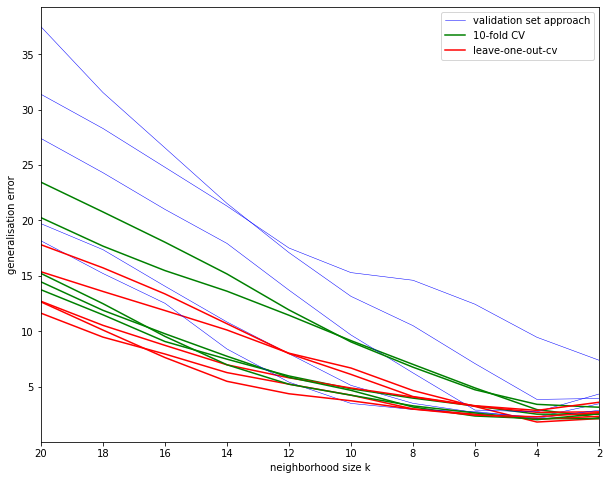

In [7]:
nn = 51
n_train = 40
n_test = nn - n_train
k_arr = [2*i for i in range(1,11)]
plt.figure(1, figsize = (10,8))

for j in range(5):
    X_data = np.random.uniform(-4,4, size = [nn, 1])
    noise = np.random.normal(0, 1.15, nn)
    y_data = np.array([X_data[i]**2+noise[i] for i in range(len(noise))])

    indices = random.sample(range(nn),n_train)

    X_train = X_data[indices]
    y_train = y_data[indices]
    X_test = np.reshape(np.delete(X_data,indices), (n_test, 1))
    y_test = np.delete(y_data,indices)

    
    validation_set_error = []
    for k in k_arr:
        y_pred = kNN_regression(X_train, y_train, X_test, k)
        error = np.sum([(y_pred[i]-y_test[i])**2 for i in range(n_test)])
        validation_set_error.append(error/n_test)
    plt.plot(k_arr, validation_set_error, 'b-', linewidth = 0.5)
    
    
    K_fold_cv(10)
    K_fold_cv(nn)
    
plt.xlim(2,20)
plt.gca().invert_xaxis()
plt.ylabel('generalisation error')
plt.xlabel('neighborhood size k')
legend_drawn_flag = True
plt.legend(["validation set approach", "10-fold CV", "leave-one-out-cv"], loc=0, frameon=legend_drawn_flag)
plt.show()